### P079 异常值检测-LOF算法

In [ ]:
import numpy as np
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor

In [ ]:
np.random.seed(42)

In [ ]:
df = pd.read_csv("./p079.csv")

In [ ]:
df.head()

In [ ]:
data = df.values
data[:10]

In [ ]:
lof = LocalOutlierFactor(n_neighbors=20)

In [ ]:
y_pred = lof.fit_predict(data)

In [ ]:
y_pred

In [ ]:
df["lof"] = y_pred

In [ ]:
df.head()

### P080 异常值检测-LOF统计离群点个数

In [ ]:
df.head()

In [ ]:
df["lof"].value_counts()

In [ ]:
df.query("lof==-1")

### P081 异常值检测 - 孤立森林Isolation Forest

In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest

In [2]:
np.random.seed(42)
df = pd.read_csv("./p081.csv")

In [3]:
df.head()

,item_length,item_width
0,6.206380,5.618286
1,5.756649,5.921924
2,5.576329,5.792401
3,5.304950,7.235000
4,6.764064,5.965792


In [4]:
outlier = IsolationForest(
    n_estimators=100,
    contamination=0.05,
    random_state=42
)

In [5]:
outlier.fit(df)

IsolationForest(contamination=0.05, random_state=42)

In [6]:
df["outlier_flag"] = outlier.predict(df)

In [7]:
df

,item_length,item_width,outlier_flag
0,6.206380,5.618286,1
1,5.756649,5.921924,1
2,5.576329,5.792401,1
3,5.304950,7.235000,1
4,6.764064,5.965792,1
...,...,...,...
395,4.417224,2.476044,-1
396,3.208315,3.746246,-1
397,1.252213,3.083772,-1
398,0.463473,3.951189,-1


### P082 异常值检测 - 孤立森林可视化异常点

In [8]:
df.head()

,item_length,item_width,outlier_flag
0,6.206380,5.618286,1
1,5.756649,5.921924,1
2,5.576329,5.792401,1
3,5.304950,7.235000,1
4,6.764064,5.965792,1


In [9]:
df["outlier_flag"].value_counts()

 1    380
-1     20
Name: outlier_flag, dtype: int64

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

<AxesSubplot:xlabel='item_width', ylabel='item_length'>

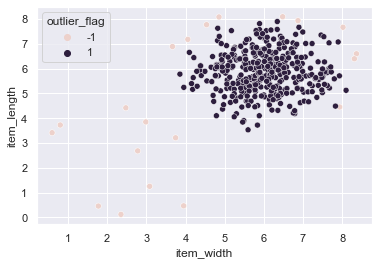

In [11]:
sns.scatterplot(
    x = df["item_width"],
    y = df["item_length"],
    hue= df["outlier_flag"]
)